In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv("AirPassengers.csv")
df.head()

,months,value
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


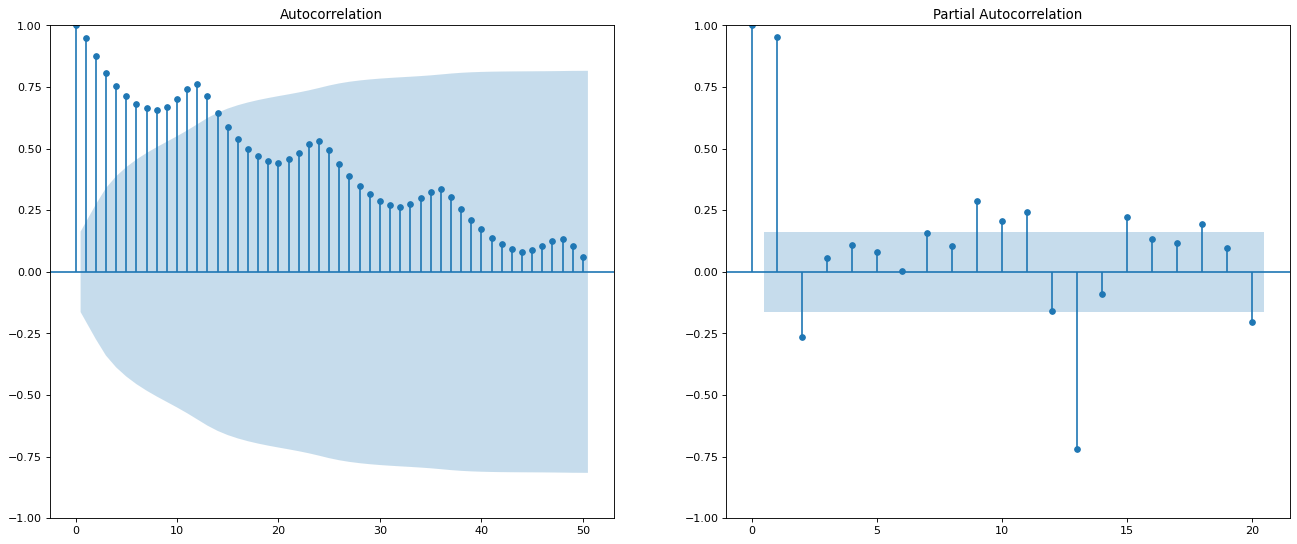

In [33]:
# Draw Plot

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8),dpi=80)
plot_acf(df.value.to_list(), ax=ax1, lags=50)
plot_pacf(df.value.to_list(), ax=ax2, lags=20)

plt.show()

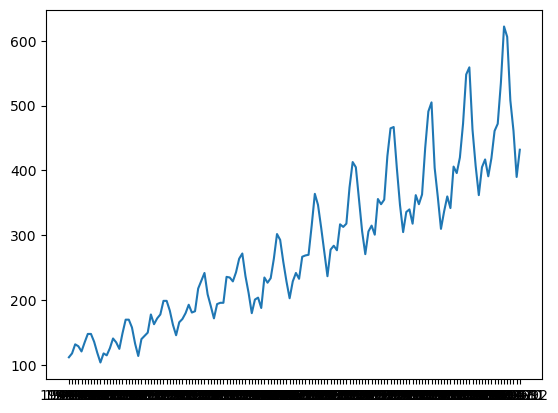

In [45]:
plt.plot(df.months, df.value)

<AxesSubplot:>

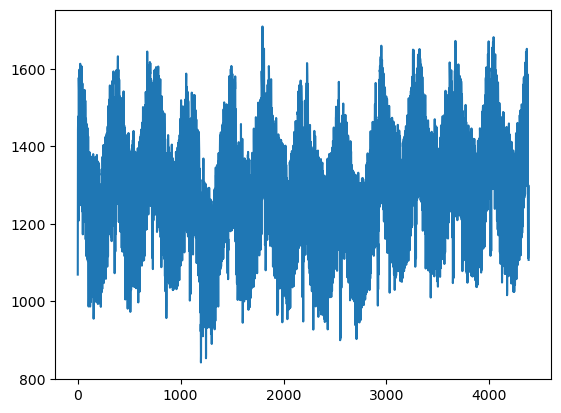

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df = df[["Date","Consumption"]]
df['Consumption'].plot()

In [107]:
df["Window3Mean"] = df["Consumption"].rolling(window=3).mean()

In [108]:
df["Window10Mean"] = df["Consumption"].rolling(window=10).mean()

In [109]:
df["Window50Mean"] = df["Consumption"].rolling(window=50).mean()

In [110]:
df["Window100Mean"] = df["Consumption"].rolling(window=100).mean()

<AxesSubplot:>

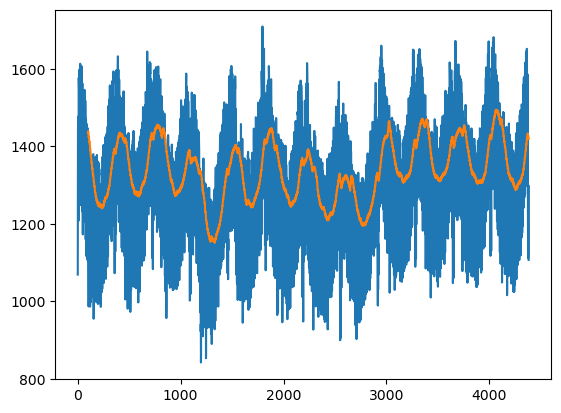

In [114]:
df['Consumption'].plot()
# df['Window3Mean'].plot()
# df['Window10Mean'].plot()
# df['Window50Mean'].plot()
df["Window100Mean"].plot()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


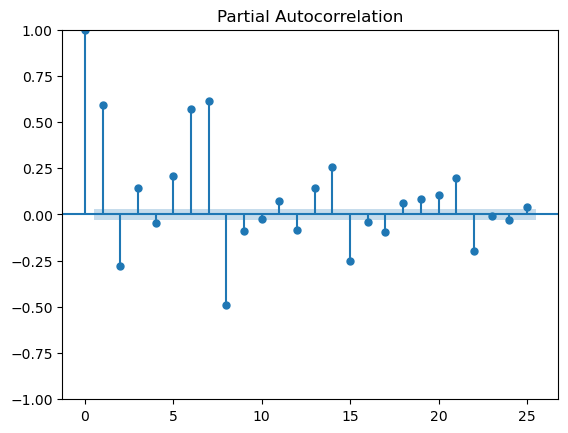

In [87]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

In [51]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

ar_model = AutoReg(train_data, lags=8).fit()


In [52]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)


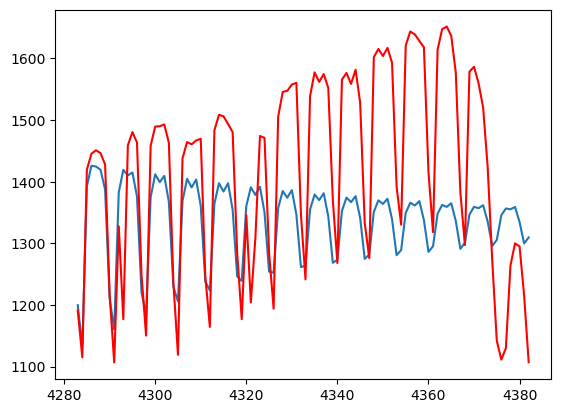

In [53]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')


In [71]:
## How to calcualte ACF manually? for lag1 and lag2
df1  = pd.DataFrame({"value":[4,5,6,7,8,9,10],"lag1":[0,4,5,6,7,8,9],"lag2":[0,0,4,5,6,7,8]})
df1

,value,lag1,lag2
0,4,0,0
1,5,4,0
2,6,5,4
3,7,6,5
4,8,7,6
5,9,8,7
6,10,9,8


In [72]:
df1.corr()

,value,lag1,lag2
value,1.000000,0.954065,0.964486
lag1,0.954065,1.000000,0.920182
lag2,0.964486,0.920182,1.000000


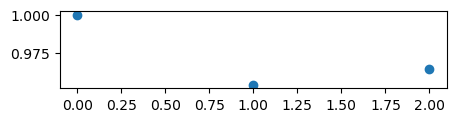

In [78]:
plt.figure(figsize=(5,1))
plt.scatter([0,1,2],df1.corr().iloc[0,:].to_list())